![Brats official annotations](https://www.med.upenn.edu/cbica/assets/user-content/images/BraTS/brats-tumor-subregions.jpg)

## Problem statement :

**To predict and localize brain tumors through image segmentation from the MRI dataset availible in Kaggle.**

I'have divided this article into a series of two parts as we are going to train two deep learning models
for the same dataset but the different tasks.
The model in this parts is a classification model that will detect tumors from the MRI image and then if a tumor
exists, we will further localize the segment of the segment of the brain having a tumor in the next part of this series.


**Prerequisite :**

Deep learning, I'will try to explicate every part thoroughly but in case you find any difficulty, let me know in the comment
section . Leat's head into the implementation part using python.


# Libraries :

In [14]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [15]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=5fac518e92a895679f5ade8ee54ba73e45676b25318ee3561e898623ff118d94
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [22]:
import streamlit as st
st.title ("Hello World")

DeltaGenerator()

In [23]:
!streamlit run app.py &>/dev/null&

In [29]:
!ngrok authtoken 2U1rHKmPmzayHCOE7qUbZCXixbV_TJqMkFtg59nsewdFeesV

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [42]:
!streamlit run /content/app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/app.py


In [44]:
!streamlit run --help

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

  Run a Python script, piping stderr to Streamlit.

  The script can be local or it can be an url. In
  the latter case, Streamlit will download the
  script to a temporary file and runs this file.

Options:
  --global.disableWatchdogWarning BOOLEAN
                                  By default,
                                  Streamlit checks
                                  if the Python
                                  watchdog module
                                  is available
                                  and, if not,
                                  prints a warning
                                  asking for you
                                  to install it.
                                  The watchdog
                                  module is not
                                  required, but
                                  highly
                                  recommended. It
                             

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from skimage import io

import tensorflow as tf
import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers , optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Data :

In [36]:
%cd /content/data_mask.csv

[Errno 20] Not a directory: '/content/data_mask.csv'
/content


**Convert the CSV file of the dataset into a data frame to perform specific operations on it.**

In [37]:
data = pd.read_csv('/content/data_mask.csv')
data.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


* **1. patient_id : Patient id for each record (dtype:Object)**
* **2. image_path : Path to the image or the MRI (dtype:Object)**
* **3. mask_path : Path to the mask of the corresponding image (dtype:Object)**
* **4. mask : Has two values : 0and1 depending on the image of the mask(dtype:int64)**

**View the DataFrame details.**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


**count the values of each class**

In [ ]:
data['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

**Visualizing the Brain MRI ,corresponding Mask, and MRI with the mask**

FileNotFoundError: ignored

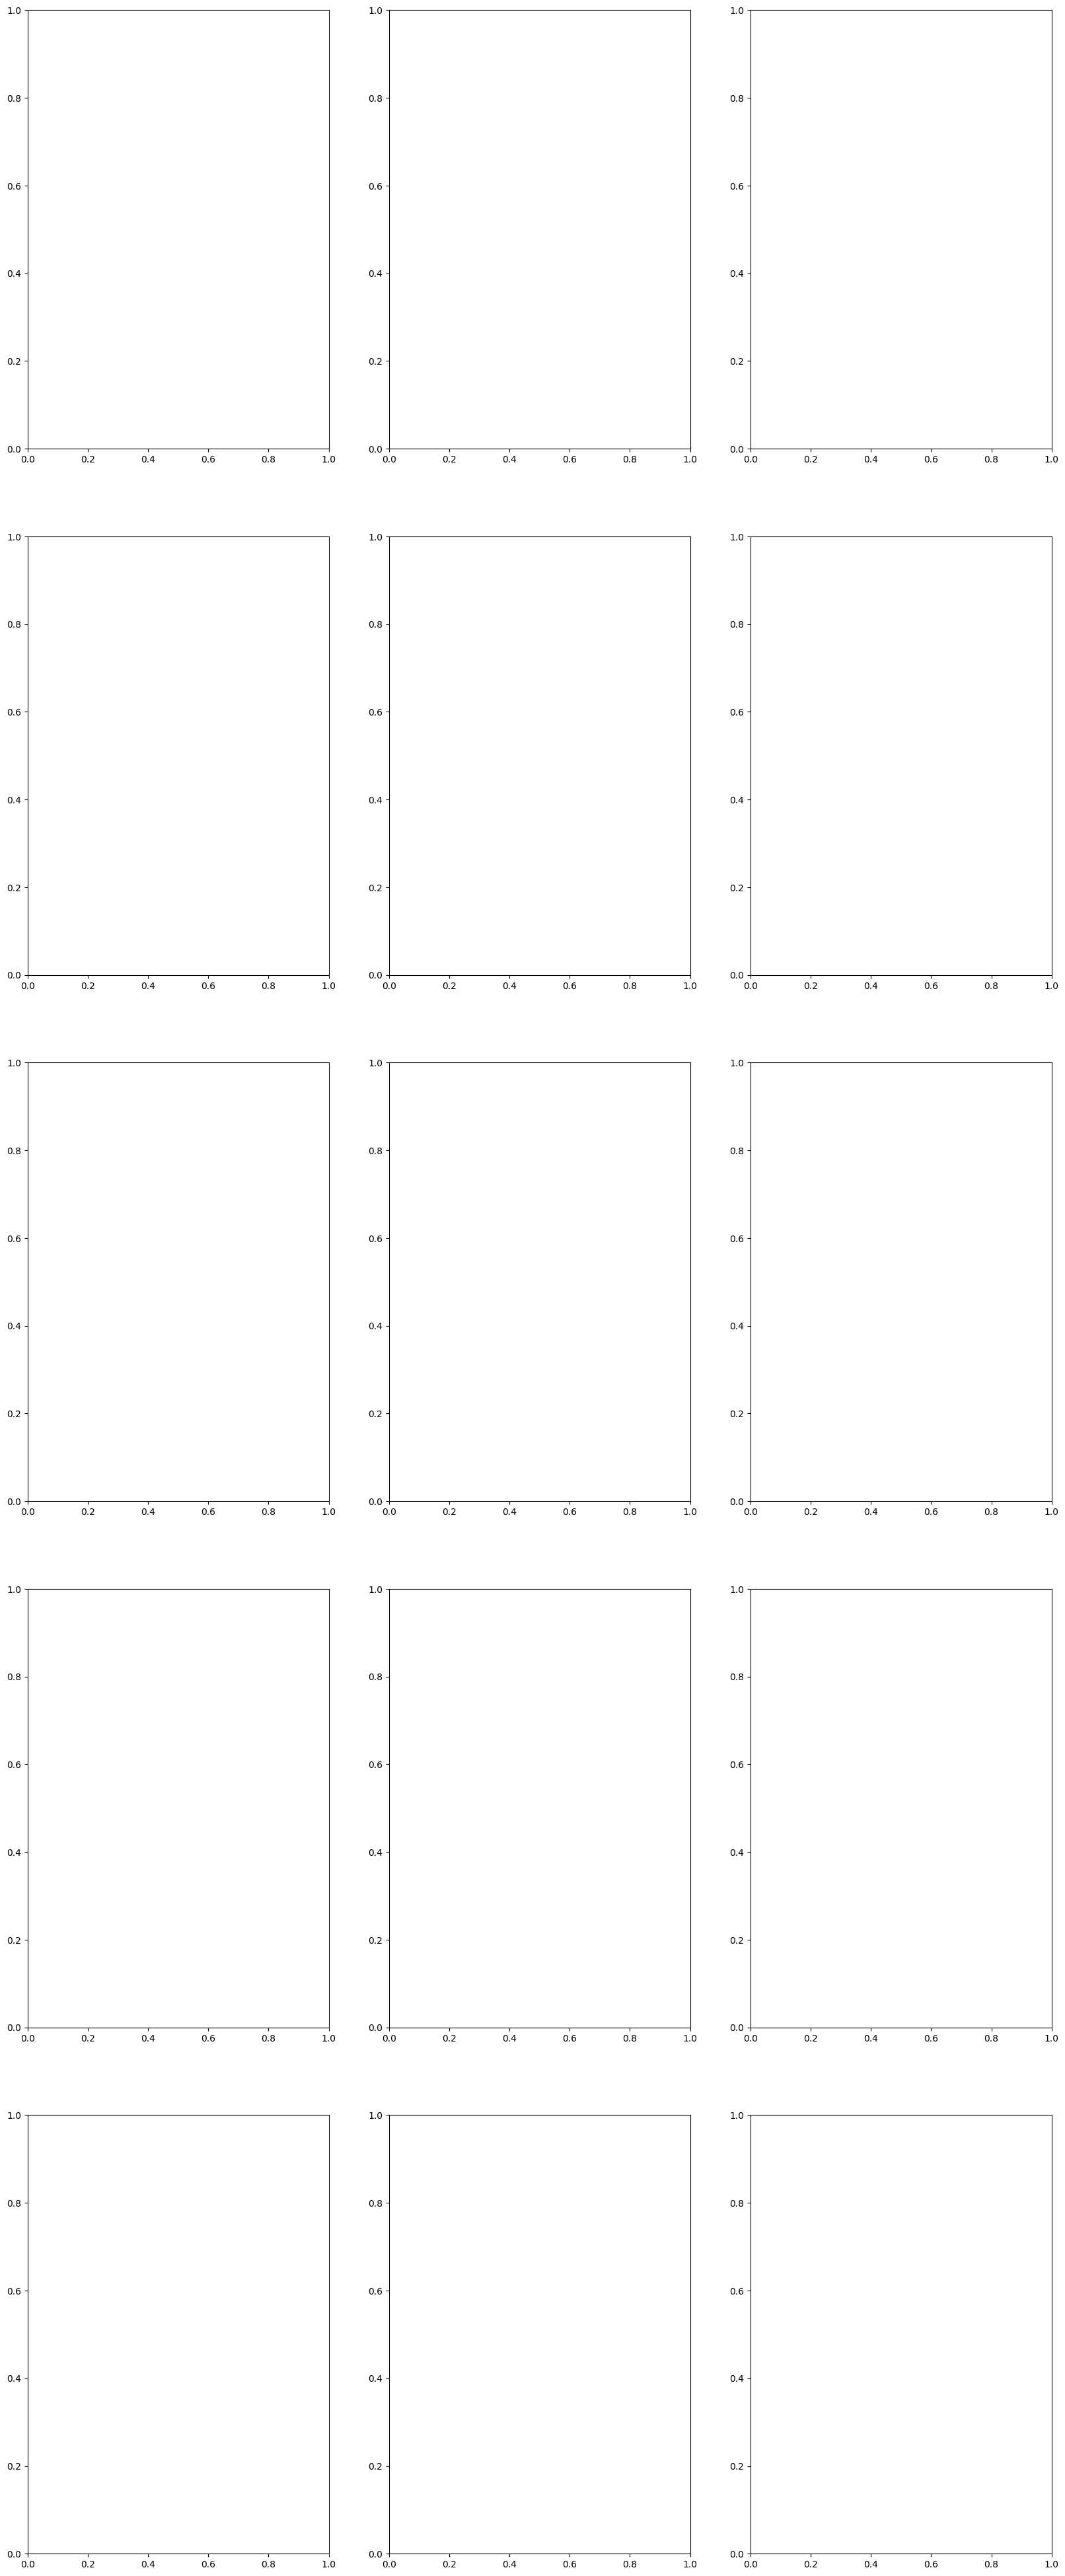

In [38]:
count = 0

fig, axs = plt.subplots(5,3, figsize=(20,50))
for i in range(len(data)):
    if data['mask'][i]==1 and count<5:
        img = io.imread(data.image_path[i])
        axs[count][0].title.set_text('Brain MRI')
        axs[count][0].imshow(img)

        mask = io.imread(data.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap="gray")

        img[mask==255] = (255,0,0)
        axs[count][2].title.set_text('MRI + Mask')
        axs[count][2].imshow(img)
        count+=1

fig.tight_layout()

**Drop the id as it is not further required for process**

In [ ]:
data = data.drop(columns = ['patient_id'])
data.shape

(3929, 3)

**Convert the data in the mask column from integer to string format as well require the data in string format.**

In [ ]:
data['mask'] = data['mask'].apply(lambda x: str(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


As you can see, now each feature has the datatype as an object.

**Split the data into train and test sets.**

In [ ]:
train , test = train_test_split(data, test_size=0.15)

 **Augmentation more data using ImageDataGenerator .generates batches of tensor image data with real-time data augmentation.**
**We will create a train_generator and validation_generator from train data and a test_generator from test data.**

In [ ]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.15)

train_gen = datagen.flow_from_dataframe(
dataframe=train,
directory='./',
x_col='image_path',
y_col='mask',
subset='training',
batch_size=16,
shuffle=True,
class_mode='categorical',
target_size=(256,256))

valid_gen = datagen.flow_from_dataframe(
dataframe=train,
directory='./',
x_col='image_path',
y_col='mask',
subset='validation',
batch_size=16,
shuffle=True,
class_mode='categorical',
target_size=(256,256))

test_gen = datagen.flow_from_dataframe(
dataframe=test,
directory='./',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=True,
target_size=(256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


**Now we will learn the concept of Transfer learning and ResNet50 Model which will be used for further training model.**

**Transfer Learning as the name suggests , is a technique to use the pre-trained models in your training. You can build your model on top of this pre-trained model. This is a process that helps you decrease the developement time and increase performance.**

**ResNet (Residual Network) is the ANN trained on the ImageNet dataset that can be used to train the model on top of it. ResNet50 is the variant of the resnet model which has 48 convolution layers along with one MaxPool 1 Average Pool Layer.**

**========================================================================================================================================================**

**Here we are using the ResNet50 Model which is a Transfer Learning Model .Using this, we will further add more layers to build our model.**

In [ ]:
BaseModel = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))
BaseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

you can view the layers in the ResNet50 model by using.summary() as shown above

**Freeze the model weights . it means we will keep the weights constant so that it does not update further .**
**This will avoid destroying any information during further training .**

In [ ]:
for layer in BaseModel.layers:
    layers.trainable=False

**Now as stated above we will add more layers on the top of the layers of ResNet50.**
**These layers will learn to turn the old features into predictions on our dataset.**

In [ ]:
headmodel = BaseModel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)

model = Model(inputs=BaseModel.input, outputs=headmodel)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

these layers are added and you can see them in the summary.

* **1. Pooling layers are used to reduce the dimensions of the feature maps. The Average Pooling layer returns the average of the values.**
* **2. Flatten layers convert our data into a vector**
* **3. Dense layer is the regular deeply connected neural network layer. Bisacally ,it takes input and calculates output=activation(dot(input,kernel)+bias)**
* **4. Dropout layer prevents the model from overfitting . it randomly sets the input units of hidden layers to 0 during training .**

**Compile the above-built model. Compile defines the loss function ,the optimizer and the metrics.**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* **Performing early stopping to save the best model with the least validation loss. Early stopping performs a large number of training epochs and stops training once the model performance does not further improve on the velidation dataset.**

* **Model Checkpoint callback is used with training using model.fit() to save the weights at some interval ,so the weights can be loaded later to continue the training from the state saved.**

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
checkpointer = ModelCheckpoint(filepath='/kaggle/working/classifier-resnet-weights.hdf5', verbose=1, save_best_only=True)

**Now ,you train the model and give the callbacks defined above in the parameter.**

In [ ]:
model.fit(train_gen, steps_per_epoch=train_gen.n // 16, epochs=20, validation_data=valid_gen, validation_steps=valid_gen.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/20
177/177 [==============================] - 30s 142ms/step - loss: 0.7078 - accuracy: 0.6993 - val_loss: 2.6575 - val_accuracy: 0.6270

Epoch 00001: val_loss improved from inf to 2.65755, saving model to /kaggle/working/classifier-resnet-weights.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
177/177 [==============================] - 24s 136ms/step - loss: 0.4863 - accuracy: 0.7478 - val_loss: 4.4474 - val_accuracy: 0.6270

Epoch 00002: val_loss did not improve from 2.65755
Epoch 3/20
177/177 [==============================] - 24s 137ms/step - loss: 0.4255 - accuracy: 0.7875 - val_loss: 1.8395 - val_accuracy: 0.6230

Epoch 00003: val_loss improved from 2.65755 to 1.83949, saving model to /kaggle/working/classifier-resnet-weights.hdf5
Epoch 4/20
177/177 [==============================] - 24s 137ms/step - loss: 0.3598 - accuracy: 0.8335 - val_loss: 0.8663 - val_accuracy: 0.6270

Epoch 00004: val_loss improved from 1.83949 to 0.86635, saving model to /kaggle/working/classifier-resnet-weights.hdf5
Epoch 5/20
177/177 [==============================] - 24s 136ms/step - loss: 0.3020 - accuracy: 0.8704 - val_loss: 0.7884 - val_accuracy: 0.6149

Epoch 00005: val_loss improved from 0.86635 to 0.78842, saving model to /kaggle/working/classifier-resnet-weights.hdf5
Epoch 6/

# if this code was informative for you ,vote it up ,and than kyou